In [2]:
from PIL import Image
from numpy import *
from pylab import *

In [3]:
import harris

In [4]:
import sift

In [5]:
sift=reload(sift)

In [7]:
imname1 = 'climbing_1_small'
imname2 = 'climbing_3_small'

im1 = array(Image.open(imname1+'.jpg').convert('L'))
im2 = array(Image.open(imname2+'.jpg').convert('L'))

sift.process_image(imname1+'.jpg', imname1+'.sift')
l1,d1 = sift.read_features_from_file(imname1+'.sift')

sift.process_image(imname2+'.jpg', imname2+'.sift')
l2,d2 = sift.read_features_from_file(imname2+'.sift')

processed tmp.pgm to climbing_1_small.sift
processed tmp.pgm to climbing_3_small.sift


In [8]:
matches = sift.match_twosided(d1, d2)

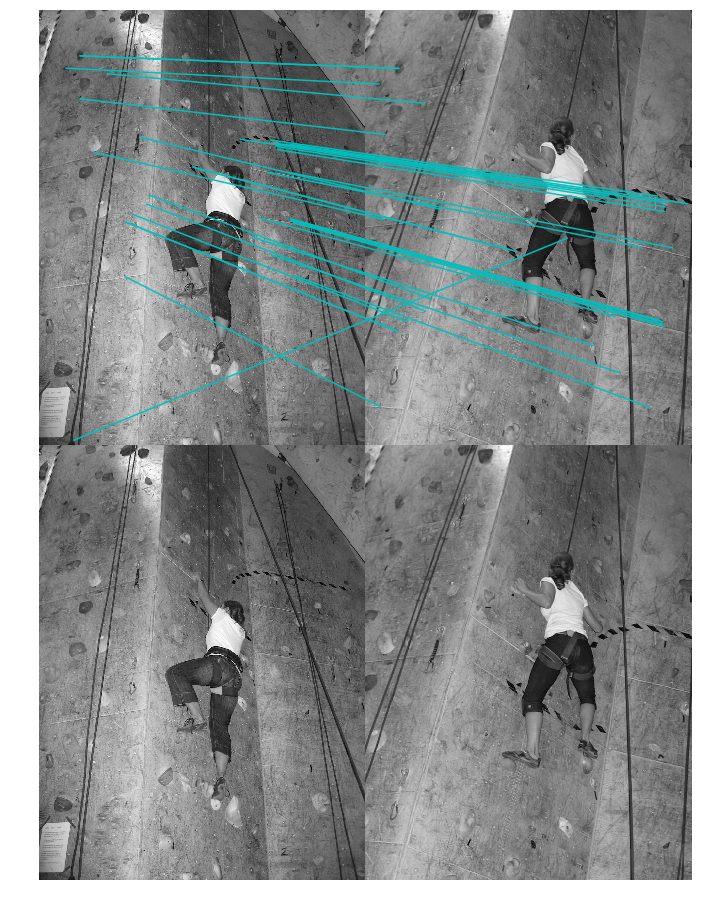

In [9]:
figure(figsize=(16, 16))
gray()
sift.plot_matches(im1, im2, l1, l2, matches)
show()

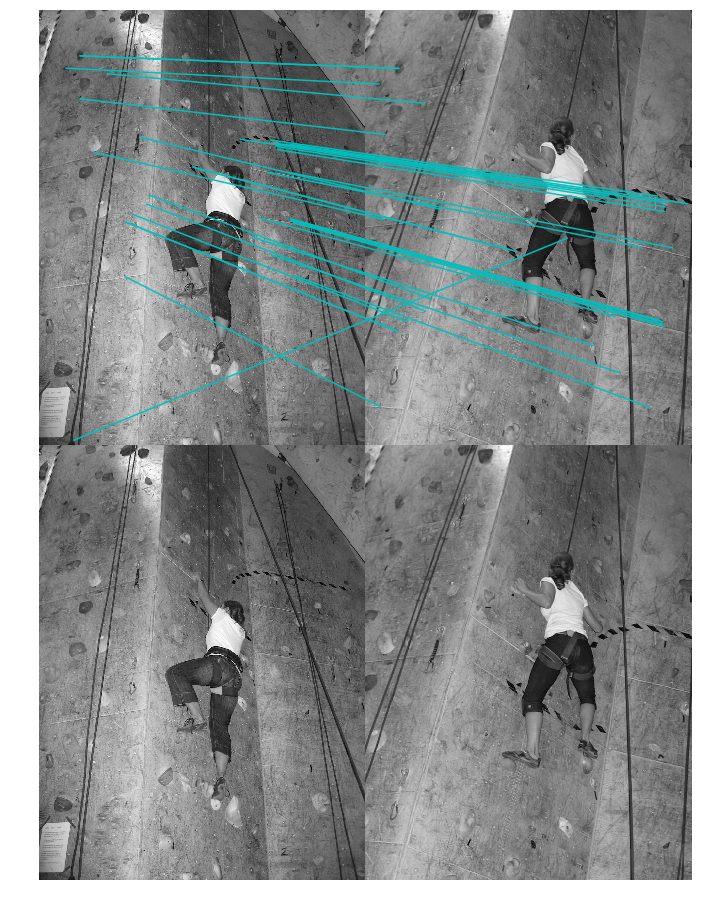

( 524.691564516 ,  563.709096774 )
( 574.438245161 ,  797.683870968 )
scale ratio: 1.50556257297
rotation: 7.8798626229


In [19]:
figure(figsize=(16,16))
show_below=True
im3 = sift.appendimages(im1, im2)
if show_below:
    im3 = vstack((im3, im3))

imshow(im3)

cols1 = im1.shape[1]
p = []
for i,m in enumerate(matches):
    if m>0:
        plot([l1[i][0],l2[m][0]+cols1],[l1[i][1],l2[m][1]],'c')
        p.append([l1[i][0], l1[i][1], l2[m][0], l2[m][1]])
axis('off')
show()

x1 = np.average((array(p).T)[0][2:-2])
y1 = np.average((array(p).T)[1][2:-2])
x2 = np.average((array(p).T)[2][2:-2])
y2 = np.average((array(p).T)[3][2:-2])
print '(', x1, ', ', y1, ')'
print '(', x2, ', ', y2, ')'

scale=[]
theta=[]
for i,m in enumerate(matches):
    if m>0:
        r1 = math.sqrt((l1[i][0]-x1)**2 + (l1[i][1]-y1)**2)
        r2 = math.sqrt((l2[m][0]-x2)**2 + (l2[m][1]-y2)**2)
        if (r2>10):
            scale.append(r2/r1)
        if (l2[m][0]-x2>10 and l1[i][0]-x1>10):
            t = math.atan2(l2[m][1]-y2, l2[m][0]-x2)-math.atan2(l1[i][1]-y1, l1[i][0]-x1)
            if (t<-pi):
                t += 2*pi
            if (t>pi):
                t -= 2*pi
            theta.append(t)
            
s = np.average(array(scale)[4:-4])
t = np.average(array(theta)[4:-4])
print "scale ratio:", s
print "rotation:", 180.0*t/pi

In [13]:
print x1, y1, x2, y2

524.691564516 563.709096774 574.438245161 797.683870968


In [14]:
print theta

[0.14462605127979888, 0.10929317630716051, 0.10929317630716051, 0.09852875306580311, 0.09191709365369849, -0.08157667895148579, 0.18673097258134397, -0.04951376615669911, -0.04951376615669911, 0.11663219365282917, 0.10666041984196162, 0.10449150597833956, -0.0518389988572574, 0.10382966205649125, -0.15038100445076052, 0.13430407977570957, 0.13430407977570957, 0.13570245749078197, 0.20751491954792856, 0.19073763676456845, 0.10220860450035296, 0.04827676493945576, 0.05078424185806707, -0.567060884434218, -0.20915663461714162, 0.26724477089192333, 3.035251862913234, 0.1374701446805029, -0.1828587566350075, 0.1344940394431356, 0.1344940394431356, -0.5265128835927788, 0.10295882261809286, 0.10301295635377228, 0.10301295635377228]


In [52]:
print sum(theta)/len(theta)

-0.0137447568764


In [56]:
0.4*180/pi

22.91831180523293

In [54]:
print pi

3.14159265359
